In [1]:
import scvelo as scv
import dynamo as dyn

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


In [2]:
adata = dyn.sample_data.DentateGyrus()

|-----> Downloading data to ./data/DentateGyrus.loom


In [3]:
adata

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [4]:
adata.layers["matrix"]

<18213x27998 sparse matrix of type '<class 'numpy.float32'>'
	with 49093260 stored elements in Compressed Sparse Row format>

In [5]:
adata.layers["spliced"]

<18213x27998 sparse matrix of type '<class 'numpy.uint16'>'
	with 35718941 stored elements in Compressed Sparse Row format>

In [4]:
adata.obs["Clusters"]

10X83_2:AAACGGGGTCTCTTTAx    5
10X83_2:AACCATGGTTCAACCAx    5
10X83_2:AACACGTTCTGAAAGAx    2
10X83_2:AAAGATGCATTGAGCTx    0
10X83_2:AACCATGTCTACTTACx    1
                            ..
10X84_3:TTTCCTCCACCATCCTx    3
10X84_3:TTTGTCACATGAAGTAx    2
10X84_3:TTTCCTCCACGGTAAGx    7
10X84_3:TTTGTCAAGCGTCAAGx    5
10X84_3:TTTCCTCGTGAAAGAGx    5
Name: Clusters, Length: 18213, dtype: int64

In [5]:
dyn.pp.recipe_monocle(adata) # Preprocess
dyn.tl.dynamics(adata) # Learn dynamics
dyn.tl.moments(adata)
dyn.tl.reduceDimension(adata) # Reduce dim

dyn.tl.cell_velocities(adata, basis='pca')
dyn.tl.cell_wise_confidence(adata) # Evaluate cell-wise velocity confidence

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

estimating gamma: 100%|████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [08:40<00:00,  3.84it/s]


|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [40.2623s]
|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [46.3518s]
|-----> incomplete neighbor graph info detected: connectivities and distances do not exist in adata.obsp, indices not in adata.uns.neighbors.
|-----> Neighbor graph is broken, recomputing....
|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices 

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs

In [6]:
adata

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs

In [7]:
dyn.vf.VectorField(adata, basis="pca") # Reconstruct vector field from learned velocity vectors
dyn.vf.topography(adata, basis="pca") # Characterize vector field topology
dyn.ext.ddhodge(adata, basis="pca") # Decompose vector field
# dyn.vf.Potential(adataT) # Map potential landscape (function does not work as of September)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] in progress: 100.0000%
|-----> [SparseVFC] finished [4.5433s]
|-----> <insert> velocity_pca_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_pca_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_pca to uns in AnnData Object.
|-----> <insert> control_point_pca to obs in AnnData Object.
|-----> <insert> inlier_prob_pca to obs in AnnData Object.
|-----> <insert> obs_vf_angle_pca to obs in AnnData Object.
|-----> [VectorField] in progress: 100.0000%
|-----> [VectorField] finished [5.8083s]
|-----> graphizing vectorfield...
|-----------> calculating neighbor indices...
|-----------> not all cells are used, set diag to 1...
|-----------> Constructing W matrix a

In [8]:
adata.layers

Layers with keys: matrix, ambiguous, spliced, unspliced, X_unspliced, X_spliced, M_u, M_uu, M_s, M_us, M_ss, velocity_S

In [9]:
adata.obsm

AxisArrays with keys: X_pca, X, cell_cycle_scores, X_umap, velocity_pca, velocity_pca_SparseVFC, X_pca_SparseVFC

In [10]:
adata.obsm["velocity_pca_SparseVFC"].shape

(18213, 30)

In [11]:
adata.obsm["velocity_pca_SparseVFC"]

array([[ 3.09821332e-02,  9.54025462e-02,  2.66349957e-01, ...,
        -6.85975917e-04, -1.09077841e-04,  1.52792195e-02],
       [ 4.72390901e-02,  6.65961798e-02,  2.41901385e-01, ...,
        -3.82721453e-03, -6.92630761e-03, -1.12428069e-02],
       [ 1.03418775e-03,  7.29030905e-02,  3.26111305e-01, ...,
        -1.93572362e-02,  1.70035460e-02,  4.29131799e-02],
       ...,
       [-1.71069893e-01, -1.34314810e-02,  1.31992024e-01, ...,
        -5.07500984e-02,  1.28674807e-02, -3.61431577e-02],
       [-3.27216324e-02,  1.29839883e-01,  5.26437682e-02, ...,
         3.11982278e-03,  6.95342930e-03, -3.95977047e-04],
       [ 7.94455121e-03,  5.04887569e-02,  1.51940931e-01, ...,
        -1.12297116e-02, -1.34372179e-03,  4.09251864e-03]])

In [12]:
adata.obsm["X_pca"]

array([[-5.4397116 ,  1.8065687 ,  1.2889941 , ...,  0.15904139,
        -0.2846297 ,  0.24169344],
       [-4.2796297 ,  1.2962435 ,  1.1722283 , ...,  0.5972916 ,
        -0.36722362, -0.70894027],
       [-5.530375  ,  3.6803744 , -2.7570221 , ..., -0.05185211,
        -0.4048993 , -0.13354102],
       ...,
       [ 1.5303736 , -5.179448  , -0.7505286 , ..., -0.45542738,
        -0.503514  ,  0.70590127],
       [-3.7544022 , -0.12061772,  3.479389  , ..., -0.26221648,
        -0.76804286,  0.24397363],
       [-2.6220903 ,  0.12841359,  1.5169004 , ...,  1.0654888 ,
        -0.9687722 , -0.757322  ]], dtype=float32)

In [13]:
adata.obsm["X_pca"]

array([[-5.4397116 ,  1.8065687 ,  1.2889941 , ...,  0.15904139,
        -0.2846297 ,  0.24169344],
       [-4.2796297 ,  1.2962435 ,  1.1722283 , ...,  0.5972916 ,
        -0.36722362, -0.70894027],
       [-5.530375  ,  3.6803744 , -2.7570221 , ..., -0.05185211,
        -0.4048993 , -0.13354102],
       ...,
       [ 1.5303736 , -5.179448  , -0.7505286 , ..., -0.45542738,
        -0.503514  ,  0.70590127],
       [-3.7544022 , -0.12061772,  3.479389  , ..., -0.26221648,
        -0.76804286,  0.24397363],
       [-2.6220903 ,  0.12841359,  1.5169004 , ...,  1.0654888 ,
        -0.9687722 , -0.757322  ]], dtype=float32)

In [14]:
adata

AnnData object with n_obs × n_vars = 18213 × 27998
    obs: 'Age', 'Cell_Conc', 'ChipID', 'ClusterName', 'Clusters', 'Comments', 'Date_Captured', 'DonorID', 'Label', 'NGI_PlateWell', 'Num_Pooled_Animals', 'PCR_Cycles', 'Plug_Date', 'Project', 'SampleID', 'SampleOK', 'Sample_Index', 'Seq_Comment', 'Seq_Lib_Date', 'Seq_Lib_Ok', 'Serial_Number', 'Sex', 'Species', 'Strain', 'TSNE1', 'TSNE2', 'Target_Num_Cells', 'Tissue', 'Transcriptome', 'cDNA_Lib_Ok', 'ngperul_cDNA', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'jaccard_velocity_confidence', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'pca_ddhodge_sampled', 'pca_ddhodge_div', 'pca_potential', 'pca_ddhodge_potential'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_m', 'log_cv', 'fr

|-----> 0 genes are removed because of nan velocity values.
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [4.6386s]
|-----> X shape: (18213, 2) V shape: (18213, 2)
|-----------> plotting with basis key=X_umap


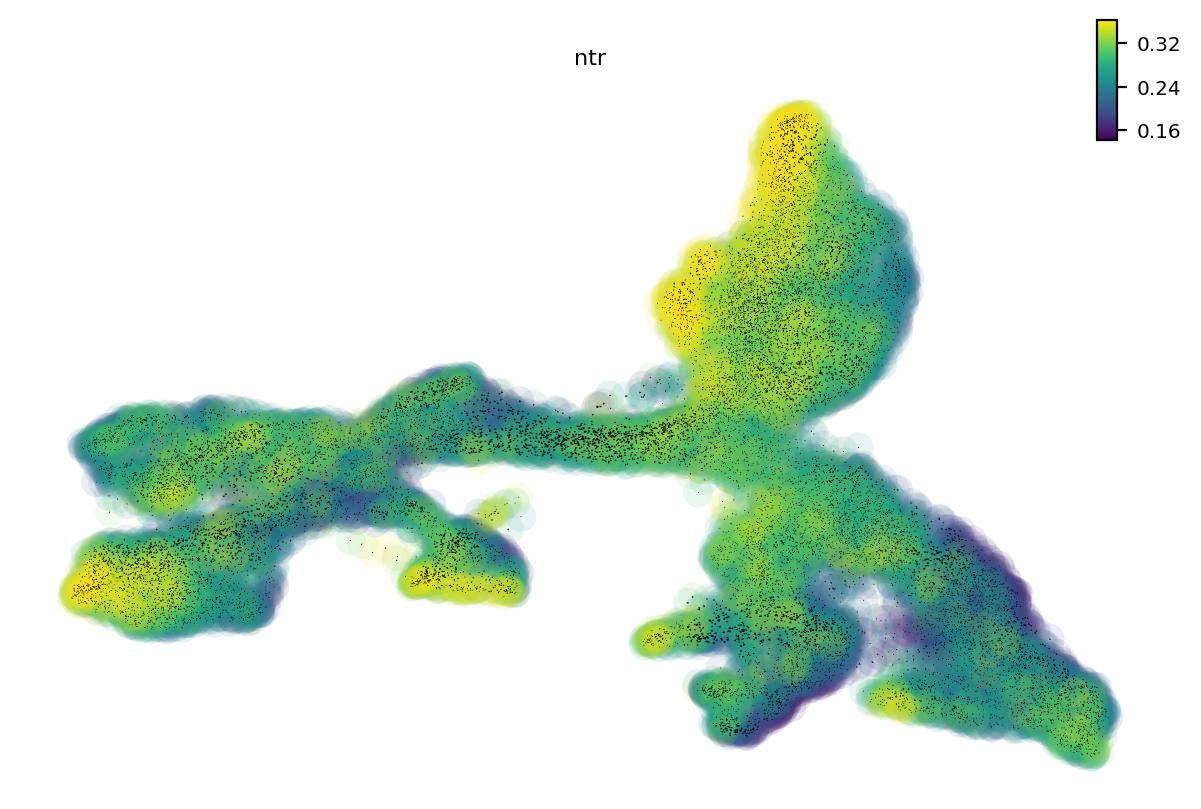

|-----------> plotting with basis key=X_umap


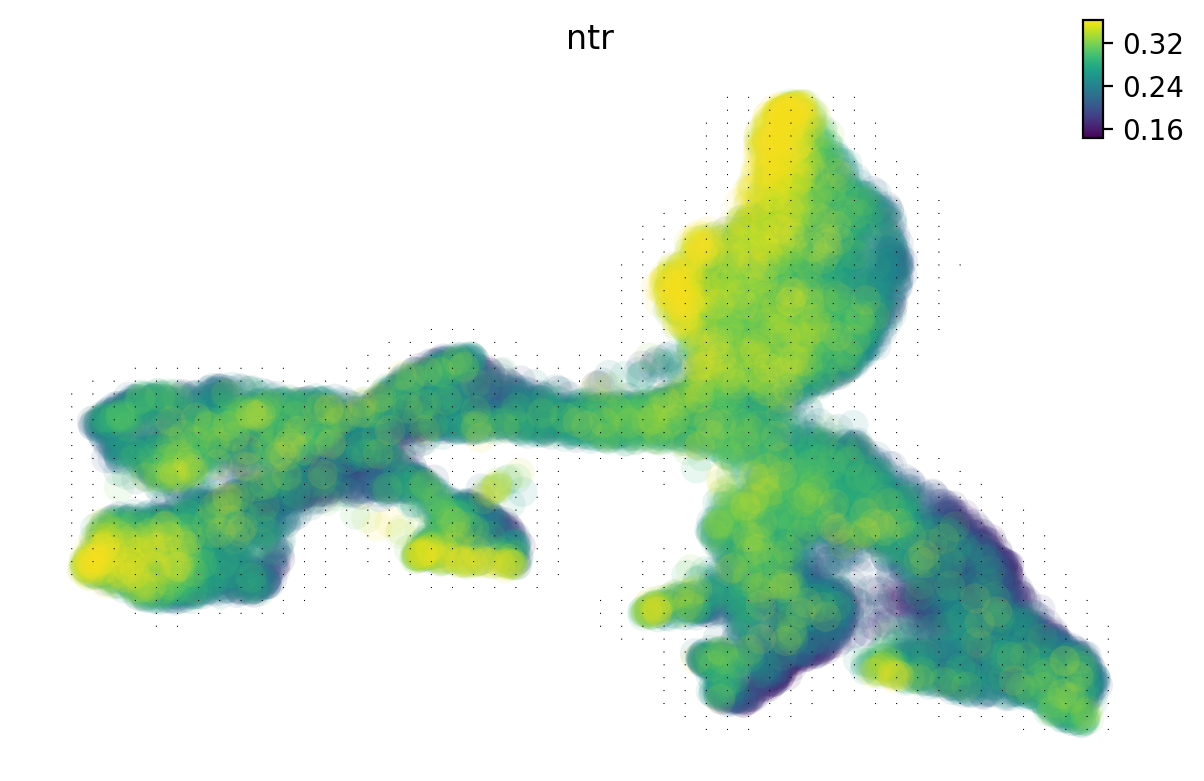

|-----------> plotting with basis key=X_umap


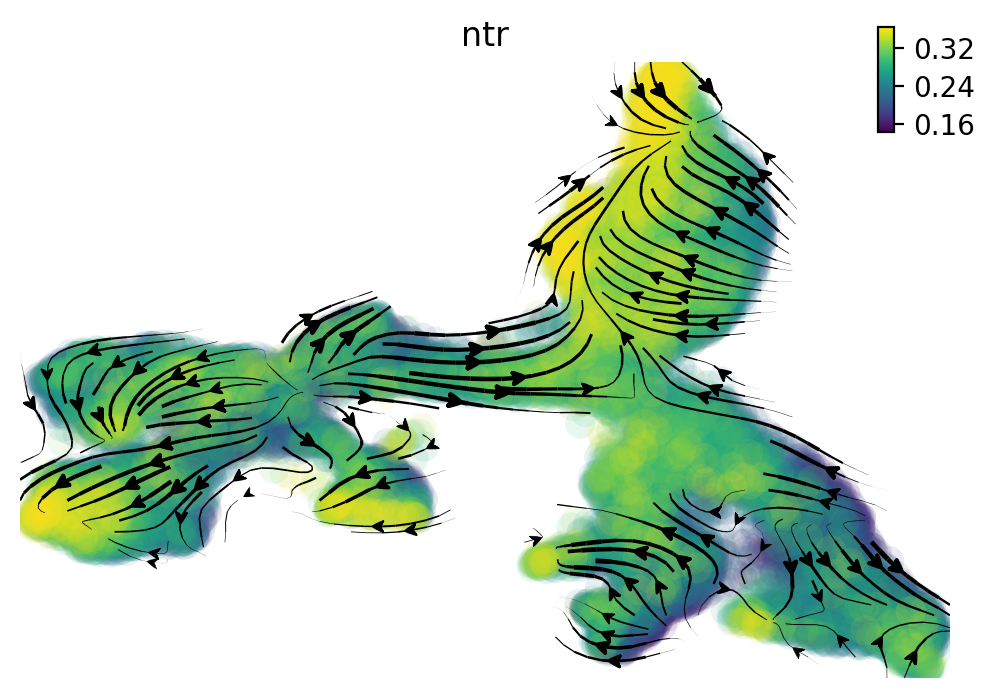

In [15]:
dyn.pl.cell_wise_vectors(adata, ncols=3)
dyn.pl.grid_vectors(adata, ncols=3)
dyn.pl.streamline_plot(adata,ncols=3)
#dyn.pl.line_integral_conv(adata)

In [16]:
import session_info
session_info.show()

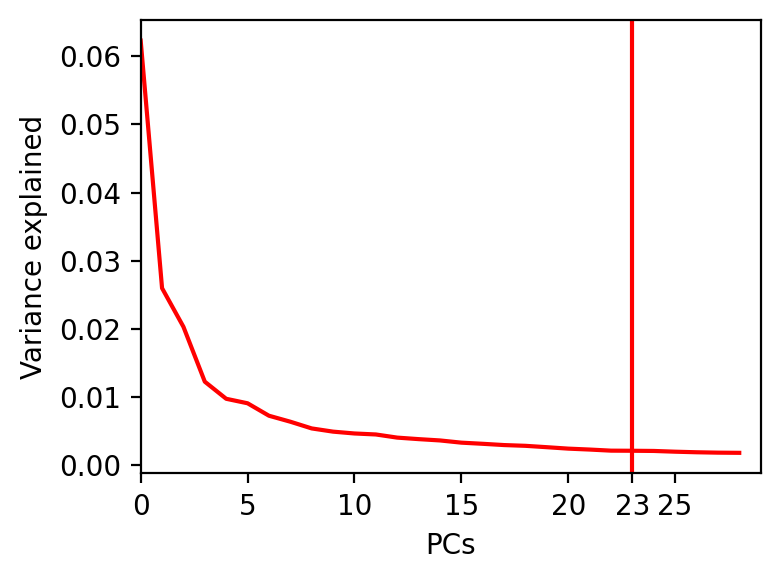

In [17]:
dyn.pl.variance_explained(adata)

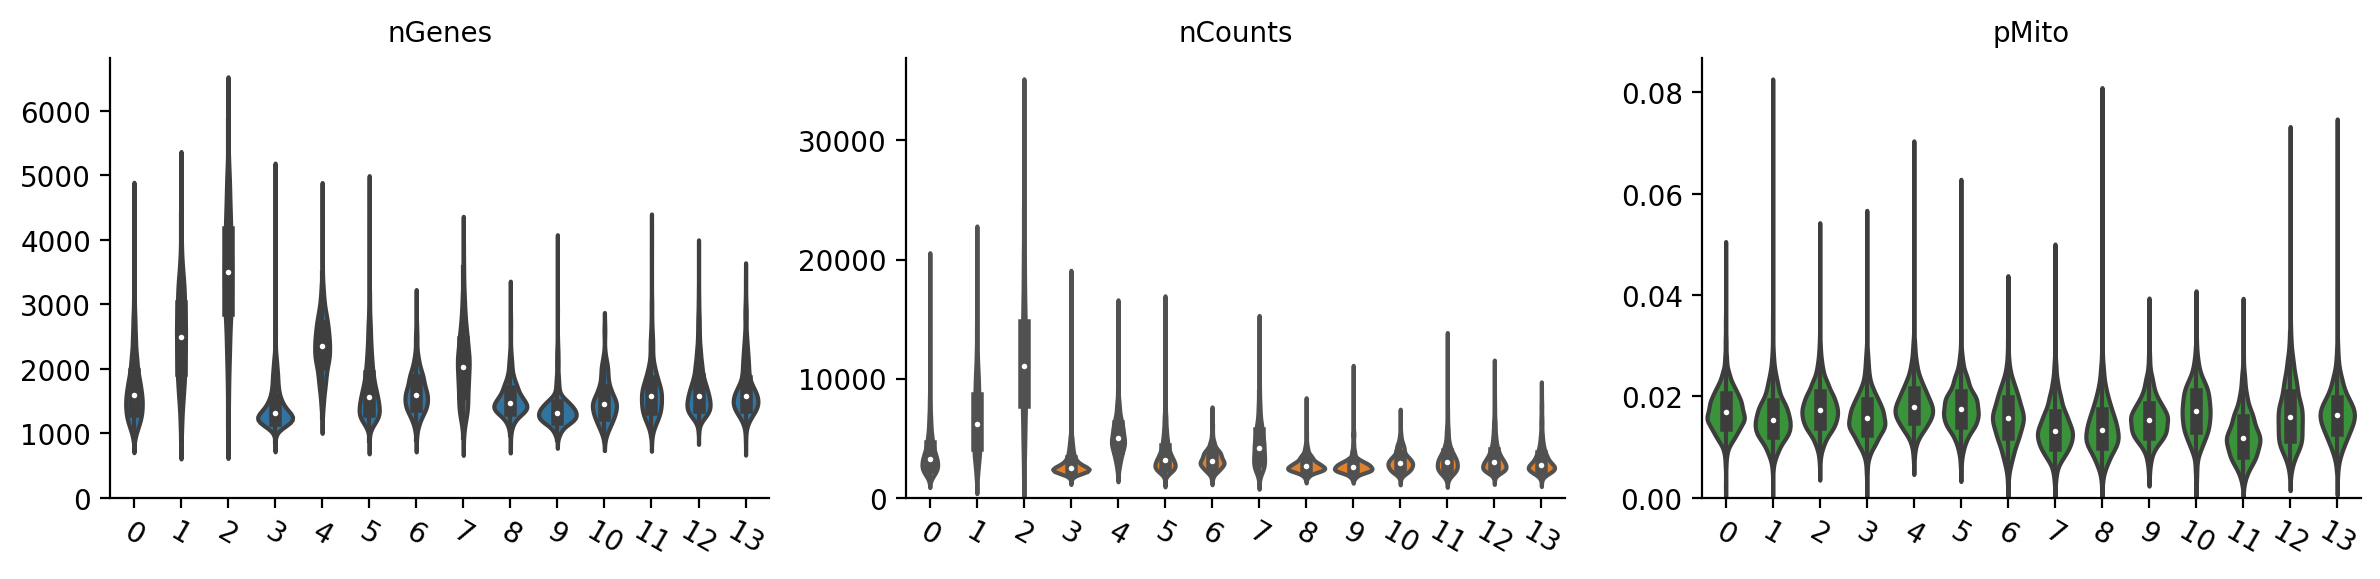

In [18]:
dyn.pl.basic_stats(adata, group="Clusters")

In [19]:
dyn.pl.state_graph(adata)

KeyError: None

In [20]:
type(adata.obs["Clusters"])

pandas.core.series.Series

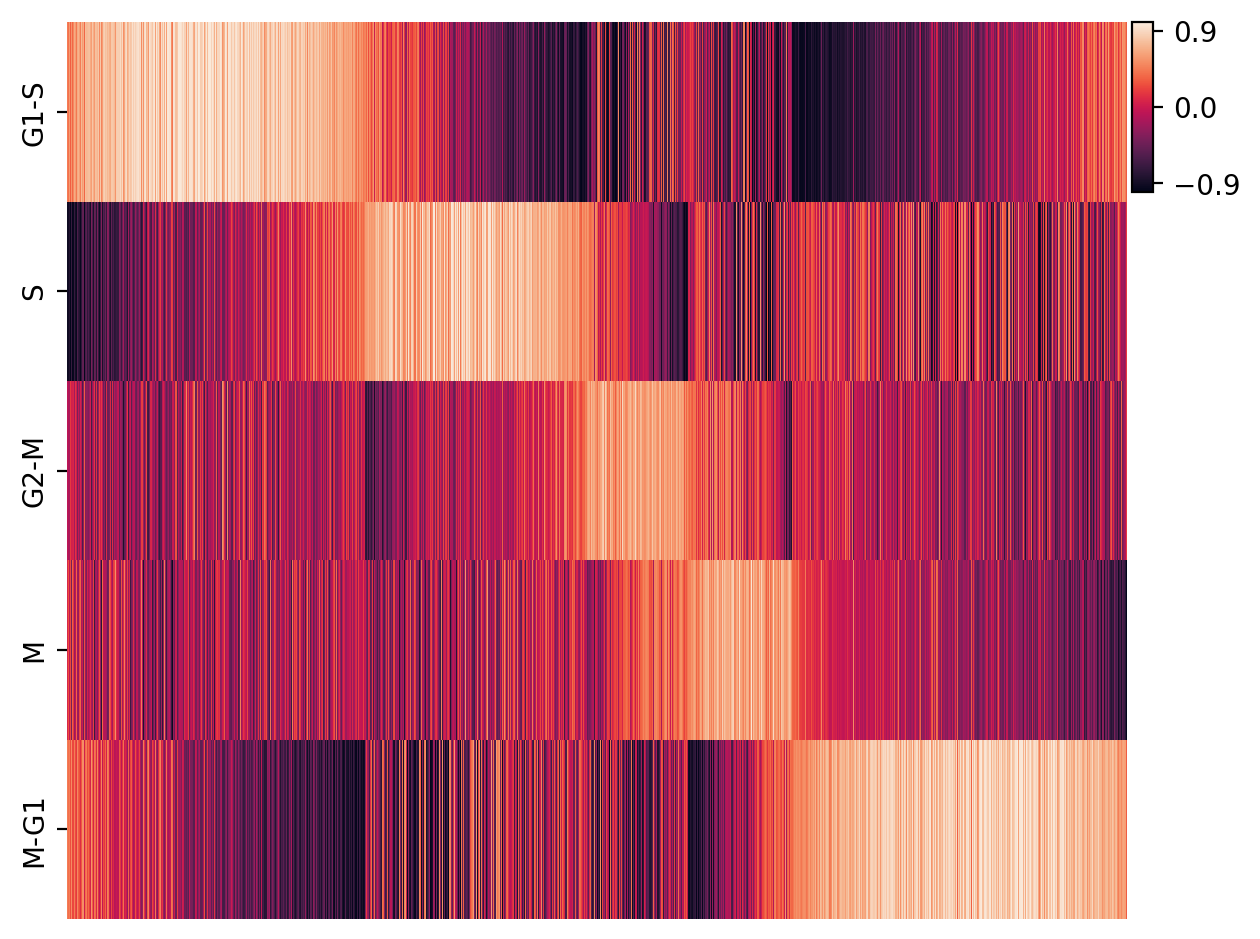

In [21]:
dyn.pl.cell_cycle_scores(adata)

In [22]:
adata.obsm["X_pca"].shape

(18213, 30)

In [23]:
adata.obsm["velocity_pca_SparseVFC"].shape

(18213, 30)

In [24]:
adata.obsm["X"].shape

(18213, 30)

In [25]:
adata.obs["cell_cycle_phase"]

10X83_2:AAACGGGGTCTCTTTAx    M-G1
10X83_2:AACCATGGTTCAACCAx    M-G1
10X83_2:AACACGTTCTGAAAGAx    M-G1
10X83_2:AAAGATGCATTGAGCTx    M-G1
10X83_2:AACCATGTCTACTTACx    G1-S
                             ... 
10X84_3:TTTCCTCCACCATCCTx    G1-S
10X84_3:TTTGTCACATGAAGTAx       S
10X84_3:TTTCCTCCACGGTAAGx    M-G1
10X84_3:TTTGTCAAGCGTCAAGx       M
10X84_3:TTTCCTCGTGAAAGAGx    G1-S
Name: cell_cycle_phase, Length: 18213, dtype: category
Categories (5, object): ['G1-S', 'S', 'G2-M', 'M', 'M-G1']

In [26]:
adata.uns["cell_phase_genes"]

OrderedDict([('G1-S',
              array(['Mcm6', 'Luc7l3', 'Pnn', 'Gmnn', 'Srsf7', 'Pcna', 'Ssr3', 'Nasp',
                     'Clspn', 'Gins2', 'Mcm5'], dtype=object)),
             ('S',
              array(['Ube2t', 'Top2a', 'Rrm2', 'Dhfr', 'Cenpm', 'Calm2', 'Fen1',
                     'Cdca5', 'Rpa2', 'Tyms', 'Rfc2', 'Ezh2', 'Asf1b'], dtype=object)),
             ('G2-M',
              array(['Nucks1', 'Cdk1', 'Top2a', 'Kpna2', 'Aurkb', 'Cdca2', 'Ccnf',
                     'Kifc1', 'Ndc80', 'Kif20b', 'Tubb4b', 'Nusap1', 'Ccna2', 'Smc4',
                     'Psrc1', 'Cdca8', 'Mad2l1', 'Cdca3', 'Kif22', 'Bub3', 'Ckap2',
                     'Hmgb2', 'Kif23', 'Pif1'], dtype=object)),
             ('M',
              array(['Nuf2', 'Cenpf', 'Hmmr', 'Prr11', 'Birc5', 'Cks2', 'Dlgap5', 'Pbk',
                     'Gtse1', 'Srsf3', 'Kif20b', 'Tubb4b', 'Bub1', 'Aurka', 'Nusap1',
                     'Tpx2', 'Ccna2', 'Cks1b', 'Anp32e', 'Cenpe', 'Kif2c', 'Cdc20',
                     '

In [27]:
type(adata.obs["cell_cycle_phase"])

pandas.core.series.Series

In [28]:
adata.obs["cell_cycle_phase"].to_csv("cell_cycle_phase")

In [29]:
adata.obsm["X_pca"] == adata.obsm["X"]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
# save array into csv file
import numpy
numpy.savetxt("X_pca.csv", adata.obsm["X_pca"].transpose(),delimiter = ",")

In [ ]:
adata.obsm["X_pca"].transpose()

In [31]:
import numpy
numpy.savetxt("DentateGyrus_PCA_velocity.csv", adata.obsm["velocity_pca_SparseVFC"].transpose(),delimiter = ",")

In [34]:
adata.obsm["X_umap"]

array([[12.033279 , 13.55073  ],
       [11.830243 , 13.214081 ],
       [14.484212 , -1.0722432],
       ...,
       [ 3.898978 ,  6.4760346],
       [ 9.866918 , 13.054651 ],
       [10.273621 , 12.427809 ]], dtype=float32)

In [35]:
numpy.savetxt("DentateGyrus_UMAP.csv", adata.obsm["X_umap"].transpose(),delimiter = ",")